<a href="https://colab.research.google.com/github/Saf02Sam/general/blob/main/SaffaSamreen_Assignment3Problem1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. i

Creating a baseline CNN model

In [ ]:
import zipfile, os
import shutil
import math
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Model
import tensorflow.keras.utils


In [ ]:

!unzip /content/archive8.zip


Archive:  /content/archive8.zip
  inflating: flowers/flowers/daisy/daisy_000001.png  
  inflating: flowers/flowers/daisy/daisy_000002.png  
  inflating: flowers/flowers/daisy/daisy_000003.png  
  inflating: flowers/flowers/daisy/daisy_000004.png  
  inflating: flowers/flowers/daisy/daisy_000005.png  
  inflating: flowers/flowers/daisy/daisy_000006.png  
  inflating: flowers/flowers/daisy/daisy_000007.png  
  inflating: flowers/flowers/daisy/daisy_000008.png  
  inflating: flowers/flowers/daisy/daisy_000009.png  
  inflating: flowers/flowers/daisy/daisy_000010.png  
  inflating: flowers/flowers/daisy/daisy_000011.png  
  inflating: flowers/flowers/daisy/daisy_000012.png  
  inflating: flowers/flowers/daisy/daisy_000013.png  
  inflating: flowers/flowers/daisy/daisy_000014.png  
  inflating: flowers/flowers/daisy/daisy_000015.png  
  inflating: flowers/flowers/daisy/daisy_000016.png  
  inflating: flowers/flowers/daisy/daisy_000017.png  
  inflating: flowers/flowers/daisy/daisy_000018.pn

In [ ]:


#specify the directory where we store smaller data
base_dir = 'flowers_small'
#delete the directory if already exist
if(os.path.exists(base_dir)):
    shutil.rmtree(base_dir)
os.mkdir(base_dir)

#create subdirectories for train/test/validation  under the base directory
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

#create subdirectories for cat and dog under train directory
train_daisy_dir = os.path.join(train_dir, 'daisy')
os.mkdir(train_daisy_dir)
train_dandelion_dir = os.path.join(train_dir, 'dandelion')
os.mkdir(train_dandelion_dir)
train_rose_dir = os.path.join(train_dir, 'rose')
os.mkdir(train_rose_dir)
train_sunflower_dir = os.path.join(train_dir, 'sunflower')
os.mkdir(train_sunflower_dir)
train_tulip_dir = os.path.join(train_dir, 'tulip')
os.mkdir(train_tulip_dir)

#create subdirectories for cat and dog under validation directory
validation_daisy_dir = os.path.join(validation_dir, 'daisy')
os.mkdir(validation_daisy_dir)
validation_dandelion_dir = os.path.join(validation_dir, 'dandelion')
os.mkdir(validation_dandelion_dir)
validation_rose_dir = os.path.join(validation_dir, 'rose')
os.mkdir(validation_rose_dir)
validation_sunflower_dir = os.path.join(validation_dir, 'sunflower')
os.mkdir(validation_sunflower_dir)
validation_tulip_dir = os.path.join(validation_dir, 'tulip')
os.mkdir(validation_tulip_dir)

#create subdirectories for cat and dog under test directory
test_daisy_dir = os.path.join(test_dir, 'daisy')
os.mkdir(test_daisy_dir)
test_dandelion_dir = os.path.join(test_dir, 'dandelion')
os.mkdir(test_dandelion_dir)
test_rose_dir = os.path.join(test_dir, 'rose')
os.mkdir(test_rose_dir)
test_sunflower_dir = os.path.join(test_dir, 'sunflower')
os.mkdir(test_sunflower_dir)
test_tulip_dir = os.path.join(test_dir, 'tulip')
os.mkdir(test_tulip_dir)



In [ ]:
number_daisy = len(os.listdir('/content/flowers/flowers/daisy'))
train_size = int(0.6 * number_daisy)
validation_size = int(0.2 * number_daisy)


# This code segment was generated using ai using the following prompt Function to generate padded filenames
#i have filenames daisy_000001.png to daisy_000769.png in the folder /content/flowers/flowers/daisy, how do i get the filename to loop over
def get_filename_daisy(index):
    return f"daisy_{str(index).zfill(6)}.png"


for i in range(train_size):
  src = os.path.join('/content/flowers/flowers/daisy', get_filename_daisy(i+1))
  dst = os.path.join(train_daisy_dir, get_filename_daisy(i+1))
  shutil.copyfile(src, dst)
for i in range(train_size, train_size+validation_size):
  src = os.path.join('/content/flowers/flowers/daisy', get_filename_daisy(i+1))
  dst = os.path.join(validation_daisy_dir, get_filename_daisy(i+1))
  shutil.copyfile(src, dst)
for i in range(train_size+validation_size, number_daisy):
  src = os.path.join('/content/flowers/flowers/daisy', get_filename_daisy(i+1))
  dst = os.path.join(test_daisy_dir, get_filename_daisy(i+1))
  shutil.copyfile(src, dst)



number_dandelion = len(os.listdir('/content/flowers/flowers/dandelion'))
train_size = int(0.6 * number_dandelion)
validation_size = int(0.2 * number_dandelion)
def get_filename_dandelion(index):
    return f"dandelion_{str(index).zfill(6)}.png"
for i in range(train_size):
  src = os.path.join('/content/flowers/flowers/dandelion', get_filename_dandelion(i+1))
  dst = os.path.join(train_dandelion_dir, get_filename_dandelion(i+1))
  shutil.copyfile(src, dst)
for i in range(train_size, train_size+validation_size):
  src = os.path.join('/content/flowers/flowers/dandelion', get_filename_dandelion(i+1))
  dst = os.path.join(validation_dandelion_dir, get_filename_dandelion(i+1))
  shutil.copyfile(src, dst)
for i in range(train_size+validation_size, number_dandelion):
  src = os.path.join('/content/flowers/flowers/dandelion', get_filename_dandelion(i+1))
  dst = os.path.join(test_dandelion_dir, get_filename_dandelion(i+1))
  shutil.copyfile(src, dst)

number_rose = len(os.listdir('/content/flowers/flowers/rose'))
train_size = int(0.6 * number_rose)
validation_size = int(0.2 * number_rose)
def get_filename_rose(index):
    return f"rose_{str(index).zfill(6)}.png"
for i in range(train_size):
  src = os.path.join('/content/flowers/flowers/rose', get_filename_rose(i+1))
  dst = os.path.join(train_rose_dir, get_filename_rose(i+1))
  shutil.copyfile(src, dst)
for i in range(train_size, train_size+validation_size):
  src = os.path.join('/content/flowers/flowers/rose', get_filename_rose(i+1))
  dst = os.path.join(validation_rose_dir, get_filename_rose(i+1))
  shutil.copyfile(src, dst)
for i in range(train_size+validation_size, number_rose):
  src = os.path.join('/content/flowers/flowers/rose', get_filename_rose(i+1))
  dst = os.path.join(test_rose_dir, get_filename_rose(i+1))
  shutil.copyfile(src, dst)

number_sunflower = len(os.listdir('/content/flowers/flowers/sunflower'))
train_size = int(0.6 * number_sunflower)
validation_size = int(0.2 * number_sunflower)
def get_filename_sunflower(index):
    return f"sunflower_{str(index).zfill(6)}.png"
for i in range(train_size):
  src = os.path.join('/content/flowers/flowers/sunflower', get_filename_sunflower(i+1))
  dst = os.path.join(train_sunflower_dir, get_filename_sunflower(i+1))
  shutil.copyfile(src, dst)
for i in range(train_size, train_size+validation_size):
  src = os.path.join('/content/flowers/flowers/sunflower', get_filename_sunflower(i+1))
  dst = os.path.join(validation_sunflower_dir, get_filename_sunflower(i+1))
  shutil.copyfile(src, dst)
for i in range(train_size+validation_size, number_sunflower):
  src = os.path.join('/content/flowers/flowers/sunflower', get_filename_sunflower(i+1))
  dst = os.path.join(test_sunflower_dir, get_filename_sunflower(i+1))
  shutil.copyfile(src, dst)

number_tulip = len(os.listdir('/content/flowers/flowers/tulip'))
train_size = int(0.6 * number_tulip)
validation_size = int(0.2 * number_tulip)
def get_filename_tulip(index):
    return f"tulip_{str(index).zfill(6)}.png"
for i in range(train_size):
  src = os.path.join('/content/flowers/flowers/tulip', get_filename_tulip(i+1))
  dst = os.path.join(train_tulip_dir, get_filename_tulip(i+1))
  shutil.copyfile(src, dst)
for i in range(train_size,train_size+validation_size):
  src = os.path.join('/content/flowers/flowers/tulip', get_filename_tulip(i+1))
  dst = os.path.join(validation_tulip_dir, get_filename_tulip(i+1))
  shutil.copyfile(src, dst)
for i in range(train_size+validation_size, number_tulip):
  src = os.path.join('/content/flowers/flowers/tulip', get_filename_tulip(i+1))
  dst = os.path.join(test_tulip_dir, get_filename_tulip(i+1))
  shutil.copyfile(src, dst)


In [ ]:
from tensorflow.keras.preprocessing import image_dataset_from_directory
from PIL import Image

#this code segment was debugged using ai (using prompt "explain error" that is given in gemini within the colab notebook )
def verify_images(directory):
    corrupted_files = []
    for root, _, files in os.walk(directory):
        for file in files:
            if file.endswith('.png'):
                try:
                    img_path = os.path.join(root, file)
                    img = Image.open(img_path)  # Open the image
                    img.verify()  # Verify it's a valid image
                except (IOError, SyntaxError) as e:
                    print(f'Bad file: {img_path}')
                    corrupted_files.append(img_path)
    return corrupted_files

corrupted = verify_images(train_dir) + verify_images(validation_dir) + verify_images(test_dir)
for file in corrupted:
    os.remove(file)
print(f"Removed {len(corrupted)} corrupted files")


train_dataset = image_dataset_from_directory(train_dir, image_size=(180, 180), batch_size=32,labels='inferred',label_mode='int',color_mode='rgb')
validation_dataset = image_dataset_from_directory(validation_dir, image_size=(180, 180), batch_size=32,labels='inferred',label_mode='int')
test_dataset = image_dataset_from_directory(test_dir, image_size=(180, 180), batch_size=32,shuffle=False,labels='inferred',label_mode='int')

Bad file: flowers_small/train/dandelion/dandelion_000288.png
Bad file: flowers_small/train/dandelion/dandelion_000085.png
Bad file: flowers_small/validation/dandelion/dandelion_000690.png
Removed 3 corrupted files
Found 2592 files belonging to 5 classes.
Found 861 files belonging to 5 classes.
Found 870 files belonging to 5 classes.


first image array tf.Tensor(
[[[4.02277756e+01 1.72611122e+01 9.16111088e+00]
  [4.20999985e+01 2.01000004e+01 9.10000038e+00]
  [4.28333321e+01 2.08333340e+01 9.83333302e+00]
  ...
  [4.99969482e-01 3.19448352e+00 0.00000000e+00]
  [0.00000000e+00 2.93332410e+00 0.00000000e+00]
  [1.45001221e+00 9.44213867e-02 0.00000000e+00]]

 [[4.10499992e+01 1.85666676e+01 9.01666641e+00]
  [4.25999985e+01 2.06000004e+01 9.60000038e+00]
  [4.33333321e+01 2.13333340e+01 1.01666660e+01]
  ...
  [4.99969482e-01 1.66668701e+00 0.00000000e+00]
  [0.00000000e+00 2.00000000e+00 0.00000000e+00]
  [4.35003662e+00 6.66503906e-02 0.00000000e+00]]

 [[4.18722229e+01 1.98722229e+01 8.87222290e+00]
  [4.30999985e+01 2.11000004e+01 9.93333340e+00]
  [4.39722214e+01 2.19722233e+01 9.25000000e+00]
  ...
  [6.38849914e-01 1.52779651e+00 6.94453061e-01]
  [0.00000000e+00 1.98333490e+00 8.33257213e-02]
  [1.61112404e+00 6.66503906e-02 0.00000000e+00]]

 ...

 [[1.79661102e+02 1.35327759e+02 1.00661102e+02]
  [1.79399

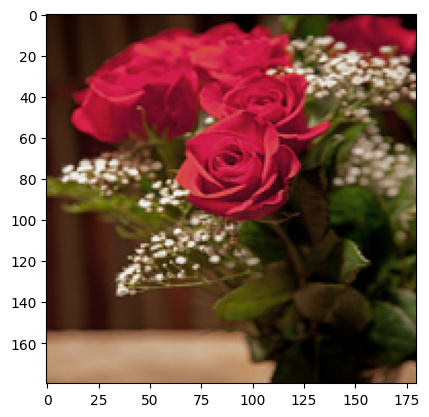

In [ ]:
for train_x_batch, train_y_batch in train_dataset:
    print('first image array', train_x_batch[0])
    plt.imshow(train_x_batch[0].numpy().astype("uint8"))
    print('first label', train_y_batch[0])
    break

In [ ]:
def build_baseline(input_shape, filters):

  #Configuring the model architecture

  #input layer for getting the input image
  input = keras.Input(shape=input_shape)

  #rescaling layer for rescalign pixels to [0,1] range
  x = layers.Rescaling(1./255)(input)


  for filter in filters:
    #A block of two conv+batchnorm+relu  layers for extractign features
    x =layers.Conv2D(filters=filter, kernel_size=3, padding="same")(x)
    x= layers.BatchNormalization()(x)
    x= layers.ReLU()(x)

    x =layers.Conv2D(filters=filter, kernel_size=3, padding="same")(x)
    x= layers.BatchNormalization()(x)
    x= layers.ReLU()(x)


    #max pooling for downsampling
    x = layers.MaxPooling2D(pool_size=2, padding="same")(x)

  #Global Average pooling. This will get an input of shape (height, width, channels) the average of each feature map and returns a vector of size channels.
  x = layers.GlobalAveragePooling2D()(x)


  #The final output layer has 5 neurons with softmax activation to output the probability of the target class
  output = layers.Dense(5,activation = 'softmax')(x)
  #create a model and set its input and output and return it
  model = keras.Model(inputs=input, outputs=output)
  return model
baseline=build_baseline(input_shape=(180,180,3), filters=[32,64,128,256, 512])
print(baseline.summary())

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling (Rescaling)                │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 180, 180, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 180, 180, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu (ReLU)                         │ (None, 180, 180, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 180, 180, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 180, 180, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_1 (ReLU)                       │ (None, 180, 180, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 90, 90, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 90, 90, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 90, 90, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_2 (ReLU)                       │ (None, 90, 90, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 90, 90, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 90, 90, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_3 (ReLU)                       │ (None, 90, 90, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 45, 45, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 45, 45, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 45, 45, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_4 (ReLU)                       │ (None, 45, 45, 128)         │              

 Total params: 4,722,725 (18.02 MB)

 Trainable params: 4,718,757 (18.00 MB)

 Non-trainable params: 3,968 (15.50 KB)

None


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-3,
    decay_steps=1000,
    decay_rate=0.9)

#compiling the model
opt = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

baseline.compile(loss="sparse_categorical_crossentropy", metrics=['accuracy'], optimizer=opt)

#callback for early stopping. stop the training if the validation_loss does not improve after 10 epochs
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, min_delta=1e-4, restore_best_weights=True)

#save the checkpointed model in your google drive cnn_lab directory: "drive/MyDrive/cnn_lab/baseline_checkpoint" .
checkpoint= keras.callbacks.ModelCheckpoint( filepath="drive/MyDrive/cnn_lab/baseline_checkpoint.keras",save_best_only=True, monitor="val_loss")

history = baseline.fit(
            train_dataset,
            validation_data = validation_dataset,
            epochs = 50,
            verbose = 1,
            callbacks=[early_stopping, checkpoint])


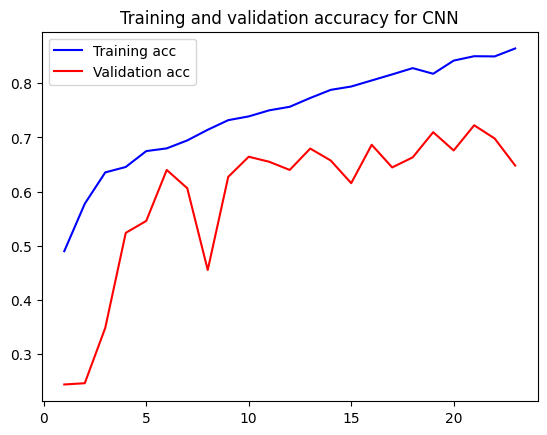

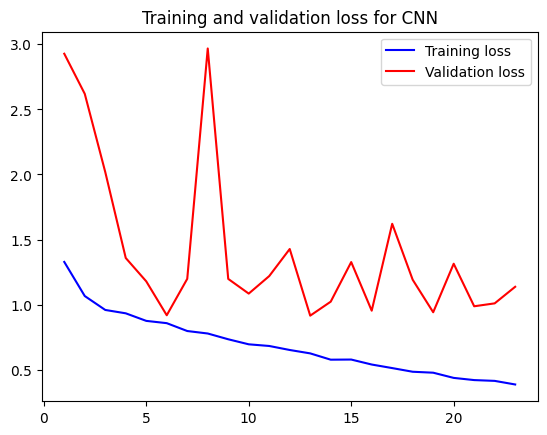

In [ ]:

#getting train and validation accuracies
train_acc_CNN = history.history['accuracy']
val_acc_CNN = history.history['val_accuracy']

#getting train and validation losses
train_loss_CNN = history.history['loss']
val_loss_CNN = history.history['val_loss']
epochs = range(1, len(train_loss_CNN) + 1)

#plotting the training and validation accurracies
plt.plot(epochs, train_acc_CNN, 'b', label='Training acc')
plt.plot(epochs, val_acc_CNN, 'r', label='Validation acc')
plt.title('Training and validation accuracy for CNN')
plt.legend()
plt.figure()

#plotting the train and validaiton losses
plt.plot(epochs, train_loss_CNN, 'b', label='Training loss')
plt.plot(epochs, val_loss_CNN, 'r', label='Validation loss')
plt.title('Training and validation loss for CNN')
plt.legend()

plt.show()

The validation loss is much higher than the training loss. Hence, the model is overfitting.

#1. ii

Adding more layers

In [ ]:
def build_baseline(input_shape, filters):

  #Configuring the model architecture

  #input layer for getting the input image
  input = keras.Input(shape=input_shape)

  #rescaling layer for rescalign pixels to [0,1] range
  x = layers.Rescaling(1./255)(input)


  for filter in filters:
    #A block of two conv+batchnorm+relu  layers for extractign features
    x =layers.Conv2D(filters=filter, kernel_size=3, padding="same")(x)
    x= layers.BatchNormalization()(x)
    x= layers.ReLU()(x)

    x =layers.Conv2D(filters=filter, kernel_size=3, padding="same")(x)
    x= layers.BatchNormalization()(x)
    x= layers.ReLU()(x)

    x =layers.Conv2D(filters=filter, kernel_size=3, padding="same")(x)
    x= layers.BatchNormalization()(x)
    x= layers.ReLU()(x)

    x =layers.Conv2D(filters=filter, kernel_size=3, padding="same")(x)
    x= layers.BatchNormalization()(x)
    x= layers.ReLU()(x)

    x =layers.Conv2D(filters=filter, kernel_size=3, padding="same")(x)
    x= layers.BatchNormalization()(x)
    x= layers.ReLU()(x)


    #max pooling for downsampling
    x = layers.MaxPooling2D(pool_size=2, padding="same")(x)

  #Global Average pooling. This will get an input of shape (height, width, channels) the average of each feature map and returns a vector of size channels.
  x = layers.GlobalAveragePooling2D()(x)


  #The final output layer has 5 neurons with softmax activation to output the probability of the target class
  output = layers.Dense(5,activation = 'softmax')(x)
  #create a model and set its input and output and return it
  model = keras.Model(inputs=input, outputs=output)
  return model
baseline=build_baseline(input_shape=(180,180,3), filters=[32,64,128,256, 512])
print(baseline.summary())

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling_1 (Rescaling)              │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 180, 180, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_10               │ (None, 180, 180, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_10 (ReLU)                      │ (None, 180, 180, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 180, 180, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_11               │ (None, 180, 180, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_11 (ReLU)                      │ (None, 180, 180, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 180, 180, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_12               │ (None, 180, 180, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_12 (ReLU)                      │ (None, 180, 180, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 180, 180, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_13               │ (None, 180, 180, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_13 (ReLU)                      │ (None, 180, 180, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 180, 180, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_14               │ (None, 180, 180, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_14 (ReLU)                      │ (None, 180, 180, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 90, 90, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 90, 90, 64)          │          18,4

 Total params: 14,165,573 (54.04 MB)

 Trainable params: 14,155,653 (54.00 MB)

 Non-trainable params: 9,920 (38.75 KB)

None


In [ ]:
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-3,
    decay_steps=1000,
    decay_rate=0.9)

#compiling the model
opt = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

baseline.compile(loss="sparse_categorical_crossentropy", metrics=['accuracy'], optimizer=opt)

#callback for early stopping. stop the training if the validation_loss does not improve after 10 epochs
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, min_delta=1e-4, restore_best_weights=True)

#save the checkpointed model in your google drive cnn_lab directory: "drive/MyDrive/cnn_lab/baseline_checkpoint" .
checkpoint= keras.callbacks.ModelCheckpoint( filepath="drive/MyDrive/cnn_lab/baseline_checkpoint.keras",save_best_only=True, monitor="val_loss")

history = baseline.fit(
            train_dataset,
            validation_data = validation_dataset,
            epochs = 50,
            verbose = 1,
            callbacks=[early_stopping, checkpoint])


Epoch 1/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 67s 507ms/step - accuracy: 0.3385 - loss: 1.7832 - val_accuracy: 0.1777 - val_loss: 3.8710
Epoch 2/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 36s 442ms/step - accuracy: 0.4571 - loss: 1.2750 - val_accuracy: 0.2439 - val_loss: 2.1618
Epoch 3/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 32s 396ms/step - accuracy: 0.5149 - loss: 1.1601 - val_accuracy: 0.2451 - val_loss: 2.6488
Epoch 4/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 41s 396ms/step - accuracy: 0.5625 - loss: 1.1466 - val_accuracy: 0.2915 - val_loss: 2.4154
Epoch 5/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 44s 440ms/step - accuracy: 0.5729 - loss: 1.0707 - val_accuracy: 0.3589 - val_loss: 2.0760
Epoch 6/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 41s 437ms/step - accuracy: 0.5919 - loss: 1.0683 - val_accuracy: 0.5180 - val_loss: 1.5470
Epoch 7/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 39s 415ms/step - accuracy: 0.6159 - loss: 1.0200 - val_accuracy: 0.5436 - val_loss: 1.4130
Epoch 8/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 40s 400ms/step - accuracy: 0.6332 - loss: 0.9975 - val_accu

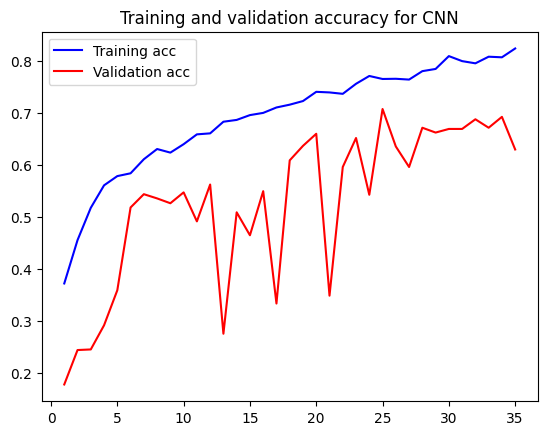

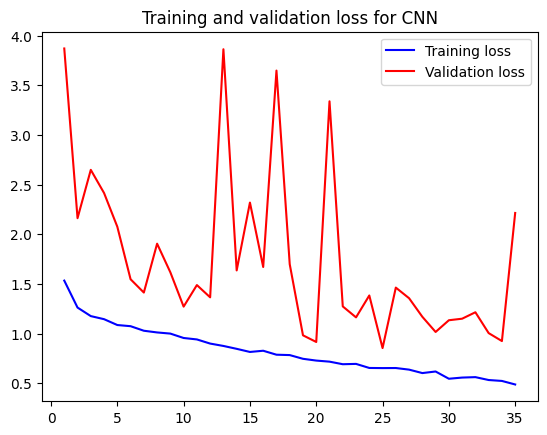

In [ ]:

#getting train and validation accuracies
train_acc_CNN = history.history['accuracy']
val_acc_CNN = history.history['val_accuracy']

#getting train and validation losses
train_loss_CNN = history.history['loss']
val_loss_CNN = history.history['val_loss']
epochs = range(1, len(train_loss_CNN) + 1)

#plotting the training and validation accurracies
plt.plot(epochs, train_acc_CNN, 'b', label='Training acc')
plt.plot(epochs, val_acc_CNN, 'r', label='Validation acc')
plt.title('Training and validation accuracy for CNN')
plt.legend()
plt.figure()

#plotting the train and validaiton losses
plt.plot(epochs, train_loss_CNN, 'b', label='Training loss')
plt.plot(epochs, val_loss_CNN, 'r', label='Validation loss')
plt.title('Training and validation loss for CNN')
plt.legend()

plt.show()

The validation loss has increased. The model seems to perform more poorly than the previous model.

#1. iii

Replacing convolutional layers with depth-wise separable convolution and
adding residual blocks

In [ ]:
def build_baseline(input_shape, filters):

  #Configuring the model architecture

  #input layer for getting the input image
  input = keras.Input(shape=input_shape)

  #rescaling layer for rescalign pixels to [0,1] range
  x = layers.Rescaling(1./255)(input)
  x = layers.Conv2D(filters=32, kernel_size=5, use_bias=False)(x)

  for size in filters:
    residual = x

    #A block of two conv+batchnorm+relu  layers for extractign features
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)
    x = layers.SeparableConv2D(size, 3, padding="same", use_bias=False)(x)

    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)
    x = layers.SeparableConv2D(size, 3, padding="same", use_bias=False)(x)

    x = layers.MaxPooling2D(3, strides=2, padding="same")(x)

    # The shape of "x" and "residual" do not match after downsampling with max pooling.
    # To match the shape of "residual" to "x", we apply a 1x1 convolution with a stride of 2.
    residual = layers.Conv2D(size, 1, strides=2, padding="same", use_bias=False)(residual)

    # add x to residual
    x = layers.add([x, residual])

  #Global Average pooling. This will get an input of shape (height, width, channels) the average of each feature map and returns a vector of size channels.
  x = layers.GlobalAveragePooling2D()(x)


  #The final output layer has 5 neurons with softmax activation to output the probability of the target class
  output = layers.Dense(5,activation = 'softmax')(x)
  #create a model and set its input and output and return it
  model = keras.Model(inputs=input, outputs=output)
  return model
baseline_improved=build_baseline(input_shape=(180,180,3), filters=[32,64,128,256, 512])
print(baseline_improved.summary())

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2             │ (None, 180, 180, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ rescaling_2 (Rescaling)   │ (None, 180, 180, 3)    │              0 │ input_layer_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_35 (Conv2D)        │ (None, 176, 176, 32)   │          2,400 │ rescaling_2[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_35    │ (None, 176, 176, 32)   │            128 │ conv2d_35[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ re_lu_35 (ReLU)           │ (None, 176, 176, 32)   │              0 │ batch_normalization_3… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ separable_conv2d          │ (None, 176, 176, 32)   │          1,312 │ re_lu_35[0][0]         │
│ (SeparableConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_36    │ (None, 176, 176, 32)   │            128 │ separable_conv2d[0][0] │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ re_lu_36 (ReLU)           │ (None, 176, 176, 32)   │              0 │ batch_normalization_3… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ separable_conv2d_1        │ (None, 176, 176, 32)   │          1,312 │ re_lu_36[0][0]         │
│ (SeparableConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_10          │ (None, 88, 88, 32)     │              0 │ separable_conv2d_1[0]… │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_36 (Conv2D)        │ (None, 88, 88, 32)     │          1,024 │ conv2d_35[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add (Add)                 │ (None, 88, 88, 32)     │              0 │ max_pooling2d_10[0][0… │
│                           │                        │                │ conv2d_36[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_37    │ (None, 88, 88, 32)     │            128 │ add[0][0]              │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ re_lu_37 (ReLU)           │ (None, 88, 88, 32)     │              0 │ batch_normalization_3… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ separable_conv2d_2        │ (None, 88, 88, 64)     │          2,336 │ re_lu_37[0][0]         │
│ (SeparableConv2D)         │                        │                │                        │
├──────────────────────

 Total params: 723,909 (2.76 MB)

 Trainable params: 720,901 (2.75 MB)

 Non-trainable params: 3,008 (11.75 KB)

None


In [ ]:


#compiling the model
opt = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
baseline_improved.compile(loss="sparse_categorical_crossentropy", metrics=['accuracy'], optimizer=opt)

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, min_delta=1e-4, restore_best_weights=True)

checkpoint= keras.callbacks.ModelCheckpoint( filepath="drive/MyDrive/cnn_lab/baseline_improved_checkpoint.keras",save_best_only=True, monitor="val_loss")

history = baseline_improved.fit(
            train_dataset,
            validation_data = validation_dataset,
            epochs = 100,
            verbose = 1,
            callbacks=[early_stopping,checkpoint])



Epoch 1/100
81/81 ━━━━━━━━━━━━━━━━━━━━ 42s 247ms/step - accuracy: 0.4146 - loss: 1.3840 - val_accuracy: 0.2439 - val_loss: 1.5935
Epoch 2/100
81/81 ━━━━━━━━━━━━━━━━━━━━ 8s 101ms/step - accuracy: 0.6083 - loss: 0.9838 - val_accuracy: 0.2439 - val_loss: 1.6185
Epoch 3/100
81/81 ━━━━━━━━━━━━━━━━━━━━ 11s 106ms/step - accuracy: 0.6571 - loss: 0.8848 - val_accuracy: 0.2439 - val_loss: 1.6952
Epoch 4/100
81/81 ━━━━━━━━━━━━━━━━━━━━ 9s 110ms/step - accuracy: 0.6867 - loss: 0.7991 - val_accuracy: 0.2439 - val_loss: 1.8888
Epoch 5/100
81/81 ━━━━━━━━━━━━━━━━━━━━ 10s 106ms/step - accuracy: 0.7001 - loss: 0.7660 - val_accuracy: 0.2544 - val_loss: 1.9982
Epoch 6/100
81/81 ━━━━━━━━━━━━━━━━━━━━ 9s 108ms/step - accuracy: 0.7584 - loss: 0.6743 - val_accuracy: 0.3868 - val_loss: 1.6686
Epoch 7/100
81/81 ━━━━━━━━━━━━━━━━━━━━ 10s 110ms/step - accuracy: 0.7571 - loss: 0.6374 - val_accuracy: 0.5807 - val_loss: 1.0935
Epoch 8/100
81/81 ━━━━━━━━━━━━━━━━━━━━ 9s 107ms/step - accuracy: 0.7979 - loss: 0.5589 - val_

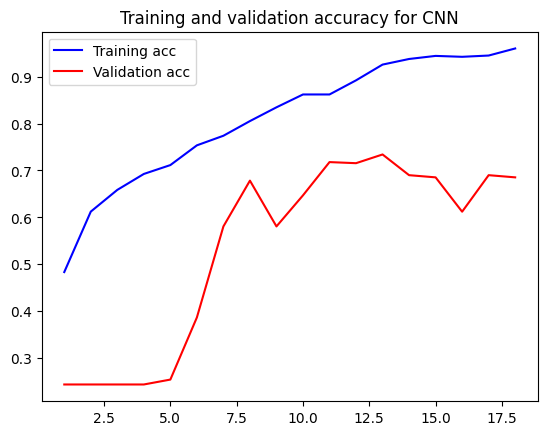

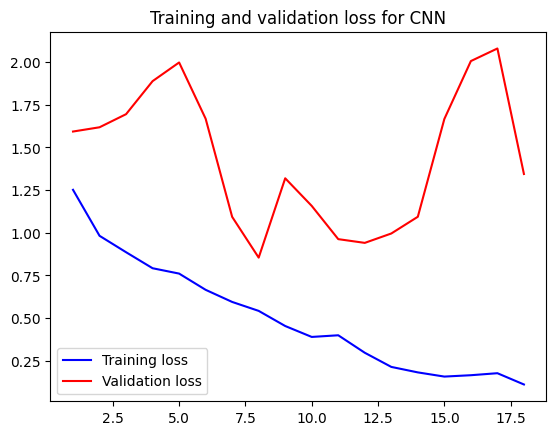

In [ ]:

#getting train and validation accuracies
train_acc_CNN = history.history['accuracy']
val_acc_CNN = history.history['val_accuracy']

#getting train and validation losses
train_loss_CNN = history.history['loss']
val_loss_CNN = history.history['val_loss']
epochs = range(1, len(train_loss_CNN) + 1)

#plotting the training and validation accurracies
plt.plot(epochs, train_acc_CNN, 'b', label='Training acc')
plt.plot(epochs, val_acc_CNN, 'r', label='Validation acc')
plt.title('Training and validation accuracy for CNN')
plt.legend()
plt.figure()

#plotting the train and validaiton losses
plt.plot(epochs, train_loss_CNN, 'b', label='Training loss')
plt.plot(epochs, val_loss_CNN, 'r', label='Validation loss')
plt.title('Training and validation loss for CNN')
plt.legend()

plt.show()

The training and validation loss have both increased compared to the previous model. This model also has increased gap between training and validation loss. This shows that the model is overfitting.

#1. iv

Adding dense layers + dropout after the GAP (Global Average Pooling)layer and before the output layer.

In [ ]:
def build_pretrained(input_shape, filters):

  #Configuring the model architecture

  #input layer for getting the input image
  input = keras.Input(shape=input_shape)

  #rescaling layer for rescalign pixels to [0,1] range
  x = layers.Rescaling(1./255)(input)
  x = layers.Conv2D(filters=32, kernel_size=5, use_bias=False)(x)

  for size in filters:
    residual = x

    #A block of two conv+batchnorm+relu  layers for extractign features
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)
    x = layers.SeparableConv2D(size, 3, padding="same", use_bias=False)(x)

    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)
    x = layers.SeparableConv2D(size, 3, padding="same", use_bias=False)(x)

    x = layers.MaxPooling2D(3, strides=2, padding="same")(x)

    # The shape of "x" and "residual" do not match after downsampling with max pooling.
    # To match the shape of "residual" to "x", we apply a 1x1 convolution with a stride of 2.
    residual = layers.Conv2D(size, 1, strides=2, padding="same", use_bias=False)(residual)

    # add x to residual
    x = layers.add([x, residual])

  #Global Average pooling. This will get an input of shape (height, width, channels) the average of each feature map and returns a vector of size channels.
  x = layers.GlobalAveragePooling2D()(x)

  x = layers.Dense(128, activation="relu")(x)
  x = layers.Dropout(0.2)(x)
  x = layers.Dense(64, activation="relu")(x)
  x = layers.Dropout(0.2)(x)

  #The final output layer has 5 neurons with softmax activation to output the probability of the target class
  output = layers.Dense(5,activation = 'softmax')(x)
  #create a model and set its input and output and return it
  model = keras.Model(inputs=input, outputs=output)
  return model
build_pretrained=build_pretrained(input_shape=(180,180,3), filters=[32,64,128,256, 512])
print(build_pretrained.summary())

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3             │ (None, 180, 180, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ rescaling_3 (Rescaling)   │ (None, 180, 180, 3)    │              0 │ input_layer_3[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_41 (Conv2D)        │ (None, 176, 176, 32)   │          2,400 │ rescaling_3[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_45    │ (None, 176, 176, 32)   │            128 │ conv2d_41[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ re_lu_45 (ReLU)           │ (None, 176, 176, 32)   │              0 │ batch_normalization_4… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ separable_conv2d_10       │ (None, 176, 176, 32)   │          1,312 │ re_lu_45[0][0]         │
│ (SeparableConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_46    │ (None, 176, 176, 32)   │            128 │ separable_conv2d_10[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ re_lu_46 (ReLU)           │ (None, 176, 176, 32)   │              0 │ batch_normalization_4… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ separable_conv2d_11       │ (None, 176, 176, 32)   │          1,312 │ re_lu_46[0][0]         │
│ (SeparableConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_15          │ (None, 88, 88, 32)     │              0 │ separable_conv2d_11[0… │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_42 (Conv2D)        │ (None, 88, 88, 32)     │          1,024 │ conv2d_41[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_5 (Add)               │ (None, 88, 88, 32)     │              0 │ max_pooling2d_15[0][0… │
│                           │                        │                │ conv2d_42[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_47    │ (None, 88, 88, 32)     │            128 │ add_5[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ re_lu_47 (ReLU)           │ (None, 88, 88, 32)     │              0 │ batch_normalization_4… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ separable_conv2d_12       │ (None, 88, 88, 64)     │          2,336 │ re_lu_47[0][0]         │
│ (SeparableConv2D)         │                        │                │                        │
├──────────────────────

 Total params: 795,589 (3.03 MB)

 Trainable params: 792,581 (3.02 MB)

 Non-trainable params: 3,008 (11.75 KB)

None


In [ ]:
opt = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
build_pretrained.compile(loss="sparse_categorical_crossentropy", metrics=['accuracy'], optimizer=opt)

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, min_delta=1e-4, restore_best_weights=True)

checkpoint= keras.callbacks.ModelCheckpoint( filepath="drive/MyDrive/cnn_lab/baseline_improved_checkpoint.keras",save_best_only=True, monitor="val_loss")

history = build_pretrained.fit(
            train_dataset,
            validation_data = validation_dataset,
            epochs = 100,
            verbose = 1,
            callbacks=[early_stopping,checkpoint])



Epoch 1/100
81/81 ━━━━━━━━━━━━━━━━━━━━ 31s 164ms/step - accuracy: 0.3741 - loss: 1.4224 - val_accuracy: 0.2439 - val_loss: 1.5772
Epoch 2/100
81/81 ━━━━━━━━━━━━━━━━━━━━ 27s 103ms/step - accuracy: 0.5189 - loss: 1.1402 - val_accuracy: 0.2439 - val_loss: 1.7300
Epoch 3/100
81/81 ━━━━━━━━━━━━━━━━━━━━ 9s 109ms/step - accuracy: 0.6080 - loss: 1.0268 - val_accuracy: 0.2439 - val_loss: 1.8111
Epoch 4/100
81/81 ━━━━━━━━━━━━━━━━━━━━ 10s 106ms/step - accuracy: 0.6326 - loss: 0.9293 - val_accuracy: 0.2451 - val_loss: 2.0002
Epoch 5/100
81/81 ━━━━━━━━━━━━━━━━━━━━ 10s 104ms/step - accuracy: 0.6443 - loss: 0.9312 - val_accuracy: 0.2787 - val_loss: 2.3155
Epoch 6/100
81/81 ━━━━━━━━━━━━━━━━━━━━ 9s 106ms/step - accuracy: 0.6911 - loss: 0.8086 - val_accuracy: 0.3728 - val_loss: 1.8795
Epoch 7/100
81/81 ━━━━━━━━━━━━━━━━━━━━ 12s 127ms/step - accuracy: 0.7233 - loss: 0.7698 - val_accuracy: 0.6109 - val_loss: 1.0426
Epoch 8/100
81/81 ━━━━━━━━━━━━━━━━━━━━ 19s 107ms/step - accuracy: 0.7230 - loss: 0.7300 - va

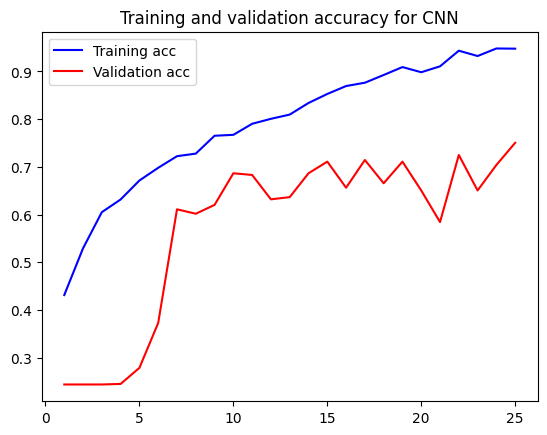

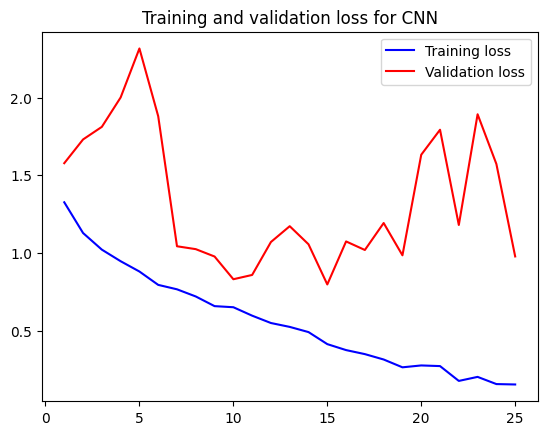

In [ ]:

#getting train and validation accuracies
train_acc_CNN = history.history['accuracy']
val_acc_CNN = history.history['val_accuracy']

#getting train and validation losses
train_loss_CNN = history.history['loss']
val_loss_CNN = history.history['val_loss']
epochs = range(1, len(train_loss_CNN) + 1)

#plotting the training and validation accurracies
plt.plot(epochs, train_acc_CNN, 'b', label='Training acc')
plt.plot(epochs, val_acc_CNN, 'r', label='Validation acc')
plt.title('Training and validation accuracy for CNN')
plt.legend()
plt.figure()

#plotting the train and validaiton losses
plt.plot(epochs, train_loss_CNN, 'b', label='Training loss')
plt.plot(epochs, val_loss_CNN, 'r', label='Validation loss')
plt.title('Training and validation loss for CNN')
plt.legend()

plt.show()

Training and validation losses have improved.

#1. v

Using data augmentation

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 180, 180, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ random_flip_9             │ (None, 180, 180, 3)    │              0 │ input_layer_1[0][0]    │
│ (RandomFlip)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ random_rotation_9         │ (None, 180, 180, 3)    │              0 │ random_flip_9[0][0]    │
│ (RandomRotation)          │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ random_zoom_9             │ (None, 180, 180, 3)    │              0 │ random_rotation_9[0][… │
│ (RandomZoom)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ rescaling_1 (Rescaling)   │ (None, 180, 180, 3)    │              0 │ random_zoom_9[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_10 (Conv2D)        │ (None, 176, 176, 32)   │          2,400 │ rescaling_1[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_10    │ (None, 176, 176, 32)   │            128 │ conv2d_10[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ re_lu_10 (ReLU)           │ (None, 176, 176, 32)   │              0 │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ separable_conv2d          │ (None, 176, 176, 32)   │          1,312 │ re_lu_10[0][0]         │
│ (SeparableConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_11    │ (None, 176, 176, 32)   │            128 │ separable_conv2d[0][0] │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ re_lu_11 (ReLU)           │ (None, 176, 176, 32)   │              0 │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ separable_conv2d_1        │ (None, 176, 176, 32)   │          1,312 │ re_lu_11[0][0]         │
│ (SeparableConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_5           │ (None, 88, 88, 32)     │              0 │ separable_conv2d_1[0]… │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_11 (Conv2D)        │ (None, 88, 88, 32)     │          1,024 │ conv2d_10[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add (Add)                 │ (None, 88, 88, 32)     │              0 │ max_pooling2d_5[0][0], │
│                      

 Total params: 795,589 (3.03 MB)

 Trainable params: 792,581 (3.02 MB)

 Non-trainable params: 3,008 (11.75 KB)

None


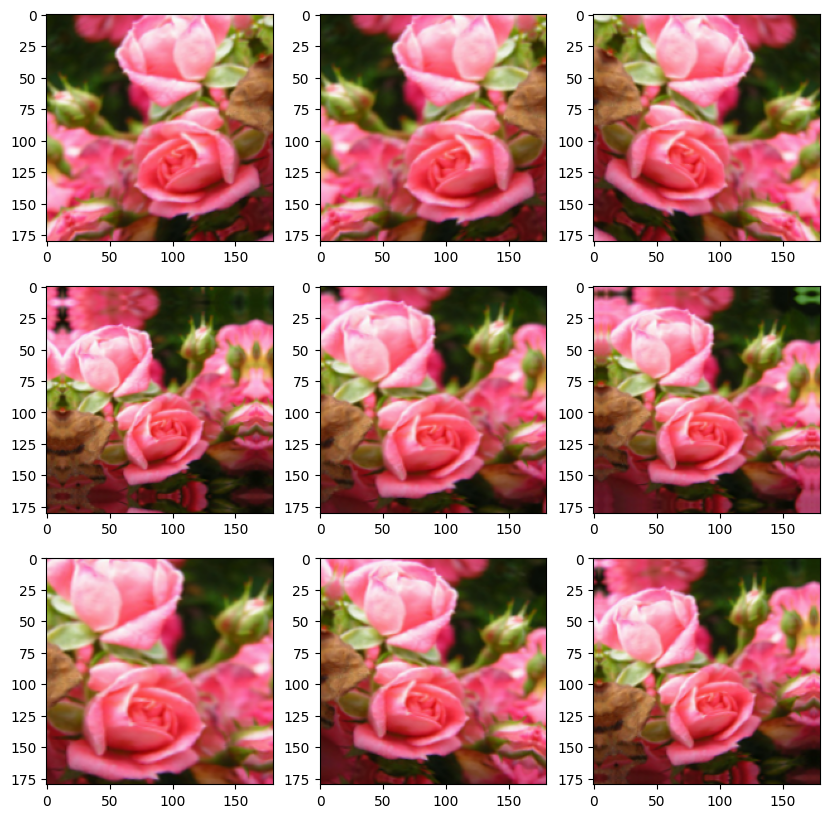

In [ ]:
def data_augmentation(x):
  x= layers.RandomFlip("horizontal")(x)
  x=layers.RandomRotation(0.1)(x)
  x=layers.RandomZoom(0.2)(x)
  return x

plt.figure(figsize=(10, 10))

#Get a batch of train_dataset
for image_batch, _ in train_dataset:
    #get the first image in the batch
    sample_image= image_batch[0]
    break;

# apply data augmentation 9 times to the sample image and show the augmented images
for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  augmented_image = data_augmentation(sample_image)
  plt.imshow(augmented_image.numpy().astype("uint8"))

def build_baseline_with_aug(input_shape,filters):

  #Configuring the model architecture

  #input layer for getting the input image
  input = keras.Input(shape=input_shape)

  #Add the data_augmentation layers here:
  x=data_augmentation(input)

  #rescaling layer for rescalign pixels to [0,1] range
  x = layers.Rescaling(1./255)(x)
  x = layers.Conv2D(filters=32, kernel_size=5, use_bias=False)(x)

  for size in filters:
    residual = x

    #A block of two conv+batchnorm+relu  layers for extractign features
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)
    x = layers.SeparableConv2D(size, 3, padding="same", use_bias=False)(x)

    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)
    x = layers.SeparableConv2D(size, 3, padding="same", use_bias=False)(x)

    x = layers.MaxPooling2D(3, strides=2, padding="same")(x)

    # The shape of "x" and "residual" do not match after downsampling with max pooling.
    # To match the shape of "residual" to "x", we apply a 1x1 convolution with a stride of 2.
    residual = layers.Conv2D(size, 1, strides=2, padding="same", use_bias=False)(residual)

    # add x to residual
    x = layers.add([x, residual])

  #Global Average pooling. This will get an input of shape (height, width, channels) the average of each feature map and returns a vector of size channels.
  x = layers.GlobalAveragePooling2D()(x)

  x = layers.Dense(128, activation="relu")(x)
  x = layers.Dropout(0.2)(x)
  x = layers.Dense(64, activation="relu")(x)
  x = layers.Dropout(0.2)(x)

  #The final output layer has 5 neurons with softmax activation to output the probability of the target class
  output = layers.Dense(5,activation = 'softmax')(x)
  #create a model and set its input and output and return it
  model = keras.Model(inputs=input, outputs=output)
  return model
build_baseline_with_aug=build_baseline_with_aug(input_shape=(180,180,3), filters=[32,64,128,256, 512])
print(build_baseline_with_aug.summary())

In [ ]:
opt = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
build_baseline_with_aug.compile(loss="sparse_categorical_crossentropy", metrics=['accuracy'], optimizer=opt)

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, min_delta=1e-4, restore_best_weights=True)

checkpoint= keras.callbacks.ModelCheckpoint( filepath="drive/MyDrive/cnn_lab/baseline_improved_checkpoint.keras",save_best_only=True, monitor="val_loss")

history = build_baseline_with_aug.fit(
            train_dataset,
            validation_data = validation_dataset,
            epochs = 100,
            verbose = 1,
            callbacks=[early_stopping,checkpoint])



Epoch 1/100
81/81 ━━━━━━━━━━━━━━━━━━━━ 29s 196ms/step - accuracy: 0.3834 - loss: 1.4210 - val_accuracy: 0.2439 - val_loss: 1.5889
Epoch 2/100
81/81 ━━━━━━━━━━━━━━━━━━━━ 15s 182ms/step - accuracy: 0.5063 - loss: 1.1380 - val_accuracy: 0.2439 - val_loss: 1.7243
Epoch 3/100
81/81 ━━━━━━━━━━━━━━━━━━━━ 15s 183ms/step - accuracy: 0.5857 - loss: 1.0461 - val_accuracy: 0.2439 - val_loss: 1.7775
Epoch 4/100
81/81 ━━━━━━━━━━━━━━━━━━━━ 21s 190ms/step - accuracy: 0.6130 - loss: 0.9675 - val_accuracy: 0.2439 - val_loss: 2.1694
Epoch 5/100
81/81 ━━━━━━━━━━━━━━━━━━━━ 15s 187ms/step - accuracy: 0.6282 - loss: 0.9292 - val_accuracy: 0.3473 - val_loss: 1.5741
Epoch 6/100
81/81 ━━━━━━━━━━━━━━━━━━━━ 15s 191ms/step - accuracy: 0.6552 - loss: 0.9303 - val_accuracy: 0.3542 - val_loss: 1.5036
Epoch 7/100
81/81 ━━━━━━━━━━━━━━━━━━━━ 22s 208ms/step - accuracy: 0.6356 - loss: 0.9174 - val_accuracy: 0.5970 - val_loss: 1.1264
Epoch 8/100
81/81 ━━━━━━━━━━━━━━━━━━━━ 19s 190ms/step - accuracy: 0.6657 - loss: 0.8670 - 

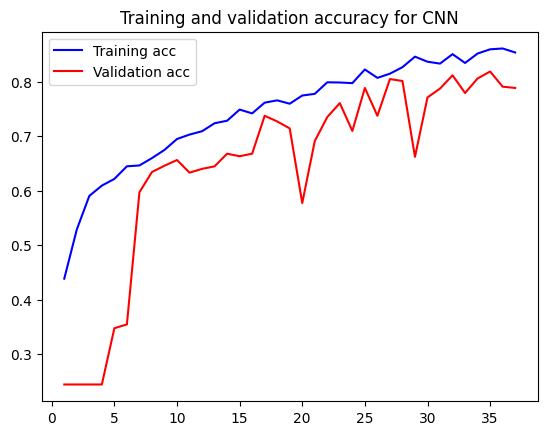

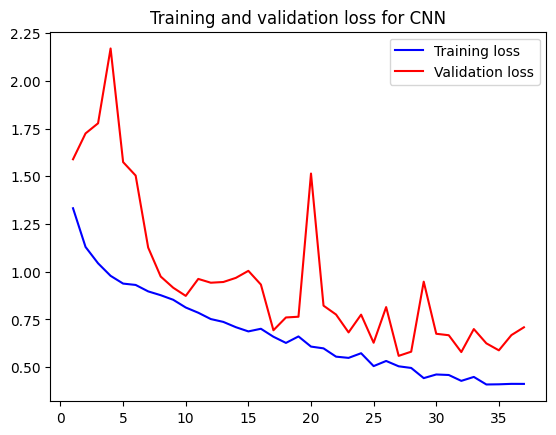

In [ ]:

#getting train and validation accuracies
train_acc_CNN = history.history['accuracy']
val_acc_CNN = history.history['val_accuracy']

#getting train and validation losses
train_loss_CNN = history.history['loss']
val_loss_CNN = history.history['val_loss']
epochs = range(1, len(train_loss_CNN) + 1)

#plotting the training and validation accurracies
plt.plot(epochs, train_acc_CNN, 'b', label='Training acc')
plt.plot(epochs, val_acc_CNN, 'r', label='Validation acc')
plt.title('Training and validation accuracy for CNN')
plt.legend()
plt.figure()

#plotting the train and validaiton losses
plt.plot(epochs, train_loss_CNN, 'b', label='Training loss')
plt.plot(epochs, val_loss_CNN, 'r', label='Validation loss')
plt.title('Training and validation loss for CNN')
plt.legend()

plt.show()

This data augmentation model has much lower training and validation losses compared to all previous models, an this model also has reduced overfitting.

#2

Transfer learning using ResNet

In [ ]:
from tensorflow.keras.applications import ResNet50V2
conv_base = ResNet50V2(weights="imagenet", include_top=False, input_shape=(180,180,3))
conv_base.trainable = False
conv_base.summary()

94668760/94668760 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


Model: "resnet50v2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2             │ (None, 180, 180, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 186, 186, 3)    │              0 │ input_layer_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 90, 90, 64)     │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 92, 92, 64)     │              0 │ conv1_conv[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 45, 45, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_preact_bn    │ (None, 45, 45, 64)     │            256 │ pool1_pool[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_preact_relu  │ (None, 45, 45, 64)     │              0 │ conv2_block1_preact_b… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 45, 45, 64)     │          4,096 │ conv2_block1_preact_r… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 45, 45, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 45, 45, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_pad        │ (None, 47, 47, 64)     │              0 │ conv2_block1_1_relu[0… │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 45, 45, 64)     │         36,864 │ conv2_block1_2_pad[0]… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 45, 45, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 45, 45, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv  

 Total params: 23,564,800 (89.89 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 23,564,800 (89.89 MB)

In [ ]:
def build_resnet(input_shape):

  #Configuring the model architecture

  #input layer for getting the input image
  input = keras.Input(shape=input_shape)

  #Add the data_augmentation layers here:
  x=data_augmentation(input)

  #rescaling layer for rescalign pixels to [0,1] range
  x = layers.Rescaling(1./255)(x)

  #Using the pre-trained conv_base
  x = conv_base(x)

  #Global Average pooling. This will get an input of shape (height, width, channels) the average of each feature map and returns a vector of size channels.
  x = layers.GlobalAveragePooling2D()(x)

  #The final output layer has one neuron with softmax activation to output the probability of the target class
  output=layers.Dense(5, activation="softmax")(x)

  #create a model and set its input and output and return it
  model = keras.Model(inputs=input, outputs=output)
  return model

resnet_model=build_resnet(input_shape=(180,180,3))
print(resnet_model.summary())



Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ random_flip_10 (RandomFlip)          │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ random_rotation_10 (RandomRotation)  │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ random_zoom_10 (RandomZoom)          │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling_2 (Rescaling)              │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ resnet50v2 (Functional)              │ (None, 6, 6, 2048)          │      23,564,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_2           │ (None, 2048)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 5)                   │          10,245 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,575,045 (89.93 MB)

 Trainable params: 10,245 (40.02 KB)

 Non-trainable params: 23,564,800 (89.89 MB)

None


In [ ]:

#compiling the model
opt = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
resnet_model.compile(loss="sparse_categorical_crossentropy", metrics=['accuracy'], optimizer=opt)


history = resnet_model.fit(
            train_dataset,
            validation_data = validation_dataset,
            epochs = 50,
            verbose = 1,
            callbacks=[early_stopping])

Epoch 1/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 21s 144ms/step - accuracy: 0.5309 - loss: 1.1963 - val_accuracy: 0.7851 - val_loss: 0.6002
Epoch 2/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 16s 112ms/step - accuracy: 0.8112 - loss: 0.5060 - val_accuracy: 0.8014 - val_loss: 0.5381
Epoch 3/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 9s 106ms/step - accuracy: 0.8444 - loss: 0.4154 - val_accuracy: 0.8072 - val_loss: 0.5316
Epoch 4/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 9s 111ms/step - accuracy: 0.8408 - loss: 0.4092 - val_accuracy: 0.8211 - val_loss: 0.4962
Epoch 5/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 10s 103ms/step - accuracy: 0.8614 - loss: 0.3656 - val_accuracy: 0.8339 - val_loss: 0.4832
Epoch 6/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 9s 112ms/step - accuracy: 0.8865 - loss: 0.3192 - val_accuracy: 0.8397 - val_loss: 0.4775
Epoch 7/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 10s 105ms/step - accuracy: 0.8740 - loss: 0.3131 - val_accuracy: 0.8397 - val_loss: 0.4660
Epoch 8/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 8s 100ms/step - accuracy: 0.8944 - loss: 0.3073 - val_accuracy

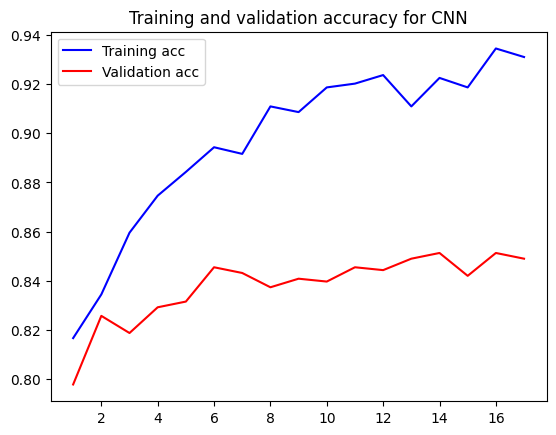

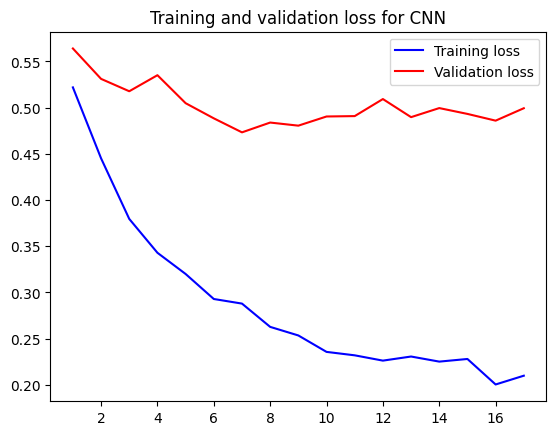

In [ ]:

#getting train and validation accuracies
train_acc_CNN = history.history['accuracy']
val_acc_CNN = history.history['val_accuracy']

#getting train and validation losses
train_loss_CNN = history.history['loss']
val_loss_CNN = history.history['val_loss']
epochs = range(1, len(train_loss_CNN) + 1)

#plotting the training and validation accurracies
plt.plot(epochs, train_acc_CNN, 'b', label='Training acc')
plt.plot(epochs, val_acc_CNN, 'r', label='Validation acc')
plt.title('Training and validation accuracy for CNN')
plt.legend()
plt.figure()

#plotting the train and validaiton losses
plt.plot(epochs, train_loss_CNN, 'b', label='Training loss')
plt.plot(epochs, val_loss_CNN, 'r', label='Validation loss')
plt.title('Training and validation loss for CNN')
plt.legend()

plt.show()

The training and validation losses have both decreased substantially more compared to the previous models.

Feature extraction and fine tuning

In [ ]:
#1
#unfreez the convolution base
conv_base.trainable = True

#set trainable to False for all layers except the last 9 , that is freeze the weights for all layers except the last 9 layers
for layer in conv_base.layers[:-9]:
    layer.trainable=False

#set trainable to True for the convolutional layhers in the last 9 layers ( the last convolutional block in DENSENET121).
for layer in conv_base.layers[-9:]:
    # we only want to unfreez the convolutional layers (batch normalizataion layers remain frozen)
    if layer.name.endswith("conv"):
      layer.trainable=True

print(resnet_model.summary())


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ random_flip_10 (RandomFlip)          │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ random_rotation_10 (RandomRotation)  │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ random_zoom_10 (RandomZoom)          │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling_2 (Rescaling)              │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ resnet50v2 (Functional)              │ (None, 6, 6, 2048)          │      23,564,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_2           │ (None, 2048)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 5)                   │          10,245 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,595,536 (90.01 MB)

 Trainable params: 3,425,285 (13.07 MB)

 Non-trainable params: 20,149,760 (76.87 MB)

 Optimizer params: 20,491 (80.05 KB)

None


In [ ]:

#compiling the model
opt = tf.keras.optimizers.Adam(learning_rate=1e-5)
resnet_model.compile(loss="sparse_categorical_crossentropy", metrics=['accuracy'], optimizer=opt)


history = resnet_model.fit(
            train_dataset,
            validation_data = validation_dataset,
            epochs = 50,
            verbose = 1,
            callbacks=[early_stopping])


Epoch 1/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 19s 139ms/step - accuracy: 0.8879 - loss: 0.3471 - val_accuracy: 0.8432 - val_loss: 0.5043
Epoch 2/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 18s 112ms/step - accuracy: 0.9027 - loss: 0.3138 - val_accuracy: 0.8455 - val_loss: 0.5028
Epoch 3/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 10s 110ms/step - accuracy: 0.9205 - loss: 0.2753 - val_accuracy: 0.8420 - val_loss: 0.4965
Epoch 4/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 10s 120ms/step - accuracy: 0.9232 - loss: 0.2455 - val_accuracy: 0.8444 - val_loss: 0.4940
Epoch 5/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 10s 120ms/step - accuracy: 0.9223 - loss: 0.2596 - val_accuracy: 0.8467 - val_loss: 0.4934
Epoch 6/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 9s 110ms/step - accuracy: 0.9312 - loss: 0.2230 - val_accuracy: 0.8432 - val_loss: 0.4923
Epoch 7/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 11s 114ms/step - accuracy: 0.9316 - loss: 0.2197 - val_accuracy: 0.8432 - val_loss: 0.4895
Epoch 8/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 11s 117ms/step - accuracy: 0.9255 - loss: 0.2370 - val_accur

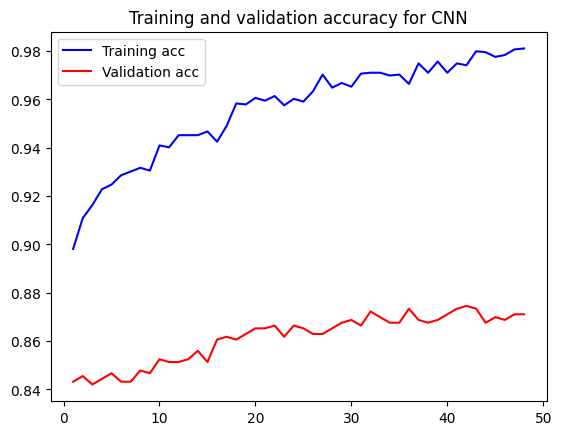

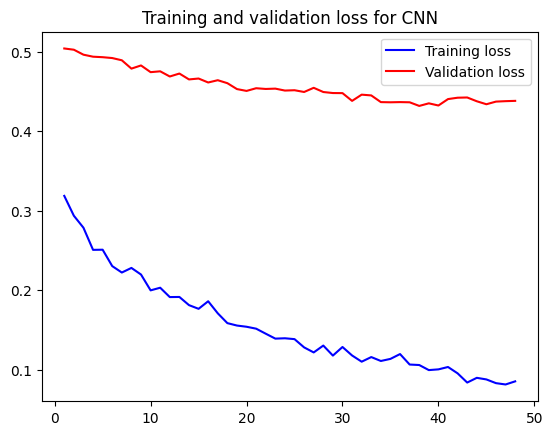

In [ ]:

#getting train and validation accuracies
train_acc_CNN = history.history['accuracy']
val_acc_CNN = history.history['val_accuracy']

#getting train and validation losses
train_loss_CNN = history.history['loss']
val_loss_CNN = history.history['val_loss']
epochs = range(1, len(train_loss_CNN) + 1)

#plotting the training and validation accurracies
plt.plot(epochs, train_acc_CNN, 'b', label='Training acc')
plt.plot(epochs, val_acc_CNN, 'r', label='Validation acc')
plt.title('Training and validation accuracy for CNN')
plt.legend()
plt.figure()

#plotting the train and validaiton losses
plt.plot(epochs, train_loss_CNN, 'b', label='Training loss')
plt.plot(epochs, val_loss_CNN, 'r', label='Validation loss')
plt.title('Training and validation loss for CNN')
plt.legend()

plt.show()

After fine tuning, the training loss has decreased further, but there isn't much difference in the validation loss

Tuning learning rate and number of residual blocks

learning rate = 1e-5


number of residual blocks = 15

In [ ]:
#2
#unfreez the convolution base
conv_base.trainable = True

#set trainable to False for all layers except the last 15 , that is freeze the weights for all layers except the last 15 layers
for layer in conv_base.layers[:-15]:
    layer.trainable=False

#set trainable to True for the convolutional layhers in the last 15 layers ( the last convolutional block in DENSENET121).
for layer in conv_base.layers[-15:]:
    # we only want to unfreez the convolutional layers (batch normalizataion layers remain frozen)
    if layer.name.endswith("conv"):
      layer.trainable=True

print(resnet_model.summary())


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ random_flip_10 (RandomFlip)          │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ random_rotation_10 (RandomRotation)  │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ random_zoom_10 (RandomZoom)          │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling_2 (Rescaling)              │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ resnet50v2 (Functional)              │ (None, 6, 6, 2048)          │      23,564,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_2           │ (None, 2048)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 5)                   │          10,245 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 30,425,617 (116.06 MB)

 Trainable params: 5,524,485 (21.07 MB)

 Non-trainable params: 18,050,560 (68.86 MB)

 Optimizer params: 6,850,572 (26.13 MB)

None


In [ ]:

#compiling the model
opt = tf.keras.optimizers.Adam(learning_rate=1e-5)
resnet_model.compile(loss="sparse_categorical_crossentropy", metrics=['accuracy'], optimizer=opt)


history = resnet_model.fit(
            train_dataset,
            validation_data = validation_dataset,
            epochs = 50,
            verbose = 1,
            callbacks=[early_stopping])


Epoch 1/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 20s 151ms/step - accuracy: 0.9740 - loss: 0.1037 - val_accuracy: 0.8688 - val_loss: 0.4317
Epoch 2/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 10s 125ms/step - accuracy: 0.9771 - loss: 0.0950 - val_accuracy: 0.8653 - val_loss: 0.4313
Epoch 3/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 11s 141ms/step - accuracy: 0.9746 - loss: 0.0959 - val_accuracy: 0.8664 - val_loss: 0.4306
Epoch 4/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 19s 116ms/step - accuracy: 0.9759 - loss: 0.0967 - val_accuracy: 0.8676 - val_loss: 0.4304
Epoch 5/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 9s 116ms/step - accuracy: 0.9697 - loss: 0.1017 - val_accuracy: 0.8664 - val_loss: 0.4308
Epoch 6/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 9s 116ms/step - accuracy: 0.9810 - loss: 0.0945 - val_accuracy: 0.8676 - val_loss: 0.4307
Epoch 7/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 11s 122ms/step - accuracy: 0.9713 - loss: 0.1076 - val_accuracy: 0.8676 - val_loss: 0.4328
Epoch 8/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 9s 115ms/step - accuracy: 0.9741 - loss: 0.0978 - val_accurac

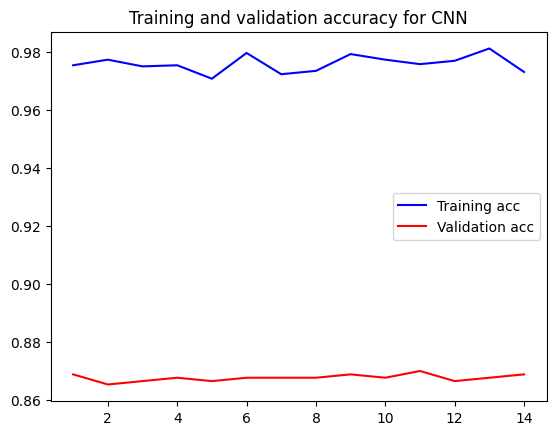

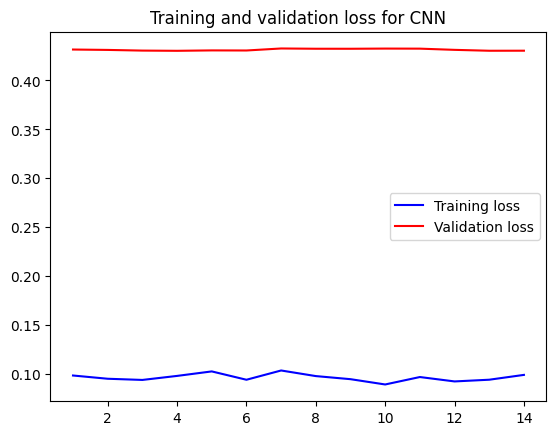

In [ ]:

#getting train and validation accuracies
train_acc_CNN = history.history['accuracy']
val_acc_CNN = history.history['val_accuracy']

#getting train and validation losses
train_loss_CNN = history.history['loss']
val_loss_CNN = history.history['val_loss']
epochs = range(1, len(train_loss_CNN) + 1)

#plotting the training and validation accurracies
plt.plot(epochs, train_acc_CNN, 'b', label='Training acc')
plt.plot(epochs, val_acc_CNN, 'r', label='Validation acc')
plt.title('Training and validation accuracy for CNN')
plt.legend()
plt.figure()

#plotting the train and validaiton losses
plt.plot(epochs, train_loss_CNN, 'b', label='Training loss')
plt.plot(epochs, val_loss_CNN, 'r', label='Validation loss')
plt.title('Training and validation loss for CNN')
plt.legend()

plt.show()

The training loss has decreased further, but there isn't much difference in the validation loss

Tuning learning rate and number of residual blocks

learning rate = 1e-6

number of residual blocks = 25

In [ ]:
#3
#unfreez the convolution base
conv_base.trainable = True

#set trainable to False for all layers except the last 25 , that is freeze the weights for all layers except the last 25 layers
for layer in conv_base.layers[:-25]:
    layer.trainable=False

#set trainable to True for the convolutional layhers in the last 25 layers ( the last convolutional block in DENSENET121).
for layer in conv_base.layers[-25:]:
    # we only want to unfreez the convolutional layers (batch normalizataion layers remain frozen)
    if layer.name.endswith("conv"):
      layer.trainable=True

print(resnet_model.summary())


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ random_flip_10 (RandomFlip)          │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ random_rotation_10 (RandomRotation)  │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ random_zoom_10 (RandomZoom)          │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling_2 (Rescaling)              │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ resnet50v2 (Functional)              │ (None, 6, 6, 2048)          │      23,564,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_2           │ (None, 2048)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 5)                   │          10,245 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,575,045 (89.93 MB)

 Trainable params: 8,943,621 (34.12 MB)

 Non-trainable params: 14,631,424 (55.81 MB)

None


In [ ]:

#compiling the model
opt = tf.keras.optimizers.Adam(learning_rate=1e-6)
resnet_model.compile(loss="sparse_categorical_crossentropy", metrics=['accuracy'], optimizer=opt)
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, min_delta=1e-4, restore_best_weights=True)



history = resnet_model.fit(
            train_dataset,
            validation_data = validation_dataset,
            epochs = 50,
            verbose = 1,
            callbacks=[early_stopping])


Epoch 1/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 29s 172ms/step - accuracy: 0.1901 - loss: 1.8474 - val_accuracy: 0.2114 - val_loss: 1.9171
Epoch 2/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 11s 140ms/step - accuracy: 0.2342 - loss: 1.7577 - val_accuracy: 0.2567 - val_loss: 1.7438
Epoch 3/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 24s 178ms/step - accuracy: 0.2736 - loss: 1.6507 - val_accuracy: 0.3206 - val_loss: 1.6272
Epoch 4/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 17s 138ms/step - accuracy: 0.3351 - loss: 1.5370 - val_accuracy: 0.3659 - val_loss: 1.5386
Epoch 5/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 12s 145ms/step - accuracy: 0.3619 - loss: 1.4816 - val_accuracy: 0.3949 - val_loss: 1.4590
Epoch 6/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 14s 168ms/step - accuracy: 0.4150 - loss: 1.4024 - val_accuracy: 0.4193 - val_loss: 1.3893
Epoch 7/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 13s 154ms/step - accuracy: 0.4407 - loss: 1.3489 - val_accuracy: 0.4472 - val_loss: 1.3283
Epoch 8/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 12s 148ms/step - accuracy: 0.4620 - loss: 1.3087 - val_accu

The training loss decreased considerably but there is not much change in the validation loss

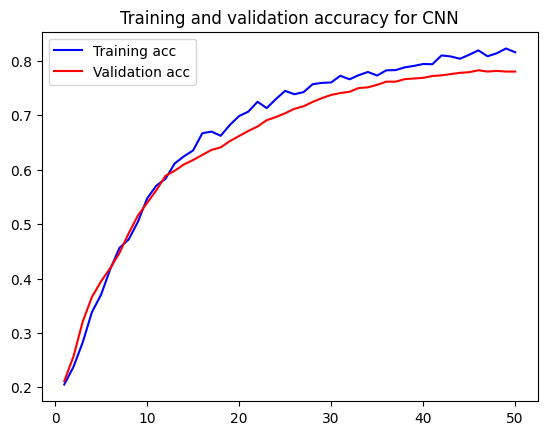

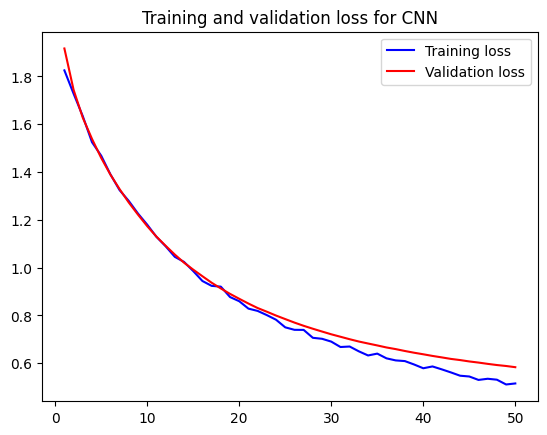

In [ ]:

#getting train and validation accuracies
train_acc_CNN = history.history['accuracy']
val_acc_CNN = history.history['val_accuracy']

#getting train and validation losses
train_loss_CNN = history.history['loss']
val_loss_CNN = history.history['val_loss']
epochs = range(1, len(train_loss_CNN) + 1)

#plotting the training and validation accurracies
plt.plot(epochs, train_acc_CNN, 'b', label='Training acc')
plt.plot(epochs, val_acc_CNN, 'r', label='Validation acc')
plt.title('Training and validation accuracy for CNN')
plt.legend()
plt.figure()

#plotting the train and validaiton losses
plt.plot(epochs, train_loss_CNN, 'b', label='Training loss')
plt.plot(epochs, val_loss_CNN, 'r', label='Validation loss')
plt.title('Training and validation loss for CNN')
plt.legend()

plt.show()

#3

Evaluating performance

28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 101ms/step - accuracy: 0.8241 - loss: 0.5084
test acc: 0.8229885101318359
test loss: 0.526584267616272
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━

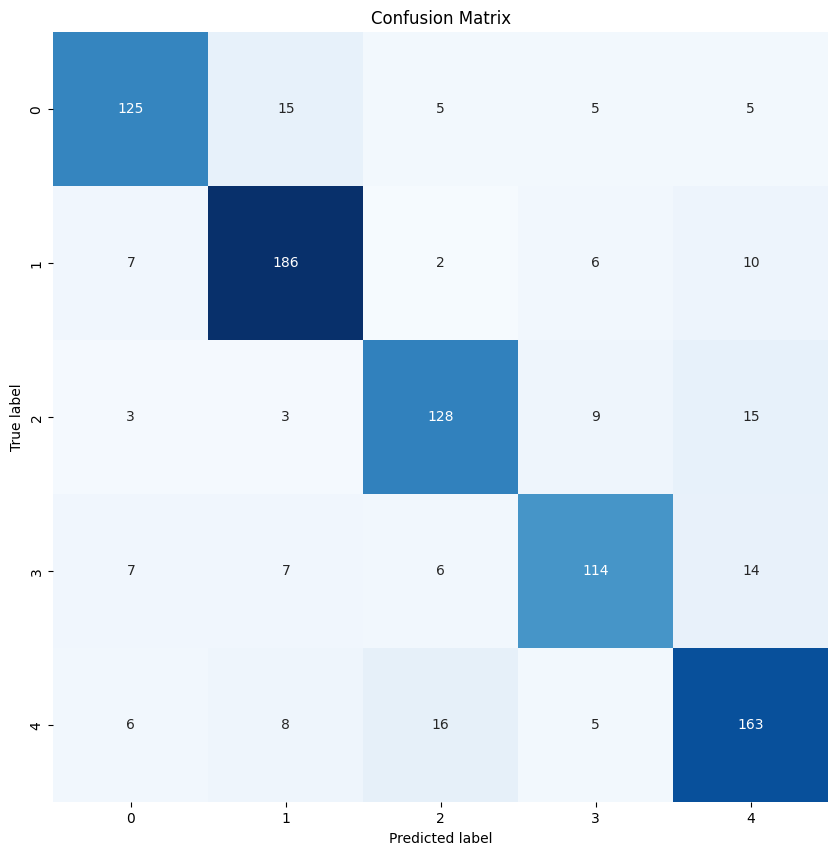

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
test_dir = os.path.join(base_dir, 'test')

#compute the loss and accurracy on the test set using model.evaluate method
test_loss, test_acc = resnet_model.evaluate(test_dataset)
print('test acc:', test_acc)
print('test loss:', test_loss)

y_pred = []
y_true = []

for x, y in test_dataset:
    y_pred.extend(np.argmax(resnet_model.predict(x), axis=-1))
    y_true.extend(y.numpy())

y_pred = np.array(y_pred)
y_true = np.array(y_true)

#compute the confusion matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize = (10,10))
sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()



#4

Analyzing precision, recall and f1 score

In [ ]:
from sklearn.metrics import classification_report
class_names = ['0','1','2','3','4']
print(classification_report(y_true, y_pred, target_names=class_names))



              precision    recall  f1-score   support

           0       0.84      0.81      0.83       155
           1       0.85      0.88      0.87       211
           2       0.82      0.81      0.81       158
           3       0.82      0.77      0.79       148
           4       0.79      0.82      0.80       198

    accuracy                           0.82       870
   macro avg       0.82      0.82      0.82       870
weighted avg       0.82      0.82      0.82       870



The model doesn't differ much classwise, but the weakest precision is for class 4.
I don't think the model requires oversampling

In [ ]:
class_counts = {}
for _, labels in train_dataset.unbatch():
    label = labels.numpy()
    class_counts[label] = class_counts.get(label, 0) + 1

print("Original class distribution in training set:", class_counts)

Original class distribution in training set: {np.int32(4): 590, np.int32(1): 631, np.int32(3): 440, np.int32(0): 461, np.int32(2): 470}


In [ ]:
target_count = max(class_counts.values())

classes_to_oversample = [cls for cls, count in class_counts.items() if count < target_count]

#this segment was generated by ai by using the prompt 'give me code for adding oversampling to my data', then i adjusted the code to fit my mode
samples_to_add = {cls: [] for cls in classes_to_oversample}
for images, labels in train_dataset.unbatch():
    label = labels.numpy()
    if label in classes_to_oversample:
        samples_to_add[label].append((images.numpy(), label))
        duplicated_samples = []
for cls in classes_to_oversample:
    num_samples_needed = target_count - class_counts[cls]
    existing_samples = samples_to_add[cls]
    for _ in range(num_samples_needed):
        img, label = existing_samples[np.random.randint(0, len(existing_samples))]
        duplicated_samples.append((img.copy(), label))
original_samples = list(train_dataset.unbatch())
combined_samples = original_samples + duplicated_samples



np.random.shuffle(combined_samples)

images = np.array([sample[0] for sample in combined_samples])
labels = np.array([sample[1] for sample in combined_samples])

batch_size = 32
oversampled_train_dataset = tf.data.Dataset.from_tensor_slices((images, labels))
oversampled_train_dataset = oversampled_train_dataset.batch(batch_size)

new_class_counts = {}
for _, labels in oversampled_train_dataset.unbatch():
    label = labels.numpy()
    new_class_counts[label] = new_class_counts.get(label, 0) + 1

print("New class distribution after duplication:", new_class_counts)

New class distribution after duplication: {np.int32(0): 631, np.int32(2): 631, np.int32(4): 631, np.int32(1): 631, np.int32(3): 631}


In [ ]:
resnet_model_oversampled = build_resnet(input_shape=(180,180,3))

opt = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
resnet_model_oversampled.compile(loss="sparse_categorical_crossentropy",
                               metrics=['accuracy'],
                               optimizer=opt)

history_oversampled = resnet_model_oversampled.fit(
    oversampled_train_dataset,
    validation_data=validation_dataset,
    epochs=50,
    verbose=1,
    callbacks=[early_stopping])




Epoch 1/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - accuracy: 0.2082 - loss: 1.6111 - val_accuracy: 0.2009 - val_loss: 1.6099
Epoch 2/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - accuracy: 0.1890 - loss: 1.6044 - val_accuracy: 0.1823 - val_loss: 1.6053
Epoch 3/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.1711 - loss: 1.6024 - val_accuracy: 0.2033 - val_loss: 1.6026
Epoch 4/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.1882 - loss: 1.6004 - val_accuracy: 0.2102 - val_loss: 1.6008
Epoch 5/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.2095 - loss: 1.5983 - val_accuracy: 0.2230 - val_loss: 1.5992
Epoch 6/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.2146 - loss: 1.5972 - val_accuracy: 0.2346 - val_loss: 1.5978
Epoch 7/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.2406 - loss: 1.5954 - val_accuracy: 0.2636 - val_loss: 1.5965
Epoch 8/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - accuracy: 0.2600 - loss: 1.5940 - val_accuracy: 0.2764 - v

In [ ]:
test_loss_oversampled, test_acc_oversampled = resnet_model_oversampled.evaluate(test_dataset)
print('Test accuracy after oversampling:', test_acc_oversampled)
print('Test loss after oversampling:', test_loss_oversampled)

y_pred_oversampled = []
y_true_oversampled = []

for x, y in test_dataset:
    y_pred_oversampled.extend(np.argmax(resnet_model_oversampled.predict(x), axis=-1))
    y_true_oversampled.extend(y.numpy())

y_pred_oversampled = np.array(y_pred_oversampled)
y_true_oversampled = np.array(y_true_oversampled)

# Comparing performance before and after oversampling
print("\nBefore oversampling:")
print(classification_report(y_true, y_pred, target_names=class_names))

print("\nAfter oversampling:")
print(classification_report(y_true_oversampled, y_pred_oversampled, target_names=class_names))

28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.3895 - loss: 1.5519
Test accuracy after oversampling: 0.34022989869117737
Test loss after oversampling: 1.5494866371154785
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


The accuracy and precision are much lower for the oversampled model and the loss is much higher.

This may be because the model might be overfitting to the training data for the duplicated images and might be bad at generalization by picking up more noise.